<a href="https://colab.research.google.com/github/Sabahat-Tufail/EDA/blob/main/EDA_chap1_python_cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import files
uploaded = files.upload()


In [52]:
df = pd.read_csv("Balaji Fast Food Sales.csv")


In [53]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [14]:
#display info about data set
df.head()


,item_name,item_price,quantity,transaction_amount
0,Aalopuri,20,13,260
1,Vadapav,20,15,300
2,Vadapav,20,1,20
3,Sugarcane juice,25,6,150
4,Sugarcane juice,25,8,200


In [15]:
#shows data type of cols
#obj means string
df.dtypes

,0
item_name,object
item_price,int64
quantity,int64
transaction_amount,int64


In [16]:
df.shape


(1000, 4)

In [17]:
#calculate mean of data using np library
mean=np.mean(df['transaction_amount'])
mean

np.float64(275.23)

In [18]:
#also find mean using pandas
mean=df['transaction_amount'].mean()
mean

np.float64(275.23)

In [19]:
#If we are taking median of a column, it means it is sorted and the middle value is median
#using numpy
median = np.median(df['transaction_amount'])
print(median)
print(type(median))

240.0
<class 'numpy.float64'>


In [20]:
median= df['transaction_amount'].median()
median
print(type(median))

<class 'float'>


In [21]:
# mode is most frequent data using scipy gives mode along with frequency
from scipy import stats
mode=stats.mode(df['quantity'])
mode

ModeResult(mode=np.int64(13), count=np.int64(86))

In [22]:
#mode using pandas only give mode number
mode=df['quantity'].mode()
mode

,quantity
0,13


In [23]:
#It tells you how far your data values are from the mean.
#If the variance is small, your values are close to each other.
#If the variance is large, your values are more spread out.
data_variance = np.var(df['transaction_amount'])
data_variance

41738.79710000015

In [24]:
data_variance = df['transaction_amount'].var()
data_variance

41780.57767767783

In [25]:
#answer of both np and pandas are different bcz numpy assumes whole population and divide by total(n) while pd deal with sample and divide with n-1


In [26]:
# Standard Deviation measures how much the values in a dataset deviate (differ) from the mean, just like variance but in the original units of the data.
data_std_dev = df['transaction_amount'].std()
data_std_dev

204.4029786418922

In [27]:
data_std_dev = np.std(df['transaction_amount'])
data_std_dev

204.3007515894157

In [28]:
max=np.max(df['transaction_amount'])
print(max)
min=np.min(df['transaction_amount'])
print(min)
range=max-min
range

900
20


880

In [29]:
#range usig pd
range=df['transaction_amount'].max()-df['transaction_amount'].min()
range

880

In [30]:
#A percentile is a value that tells you how a data point compares to the rest of the data.
percentile=np.percentile(df['transaction_amount'],50)
print(percentile)
# output means 50% of values lies below 240

240.0


In [31]:
#Percentile divides data into 100 equal parts, while quantile divides data into any number of equal parts (like 4 for quartiles, 10 for deciles, etc.).
quantile=np.quantile(df['transaction_amount'],[0.25,0.5,0.75])
print(quantile)

[120. 240. 360.]


In [32]:
#The Interquartile Range (IQR) is a measure of statistical dispersion, i.e., how spread out the middle 50% of your data is.
#IQR=Q3−Q1
IQR=stats.iqr(df['item_price'],interpolation='midpoint')
IQR

np.float64(30.0)

In [33]:
IQR=stats.iqr(df['item_price'])
IQR
#by default linear interpolation

np.float64(30.0)

In [34]:
#You often don’t land exactly on a data point.
#So, we need to interpolate between two values to estimate Q1 and Q3.

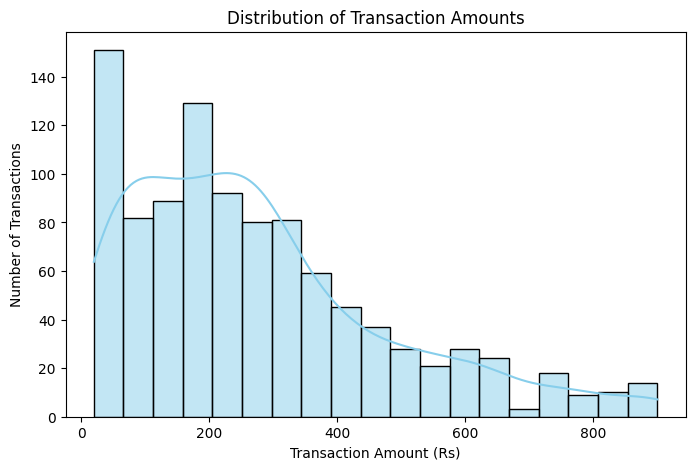

In [44]:
#Sales Amount Distribution (Histogram + KDE)

plt.figure(figsize=(8, 5))
sns.histplot(df['transaction_amount'], kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount (Rs)")
plt.ylabel("Number of Transactions")
plt.show()



# Histogram with KDE Curve  
x-axis: Transaction amount (in Rs)  
y-axis: Number of transactions  

This graph shows how much money customers usually spend in one transaction.  
Each bar shows how many people paid within a certain amount range.  
The smooth curve on top (KDE)
helps us see the overall pattern — most customers spend in the lower range, while only a few make high-value purchases.  
This helps identify customer behavior, pricing strategy, and unusual (outlier) transactions.


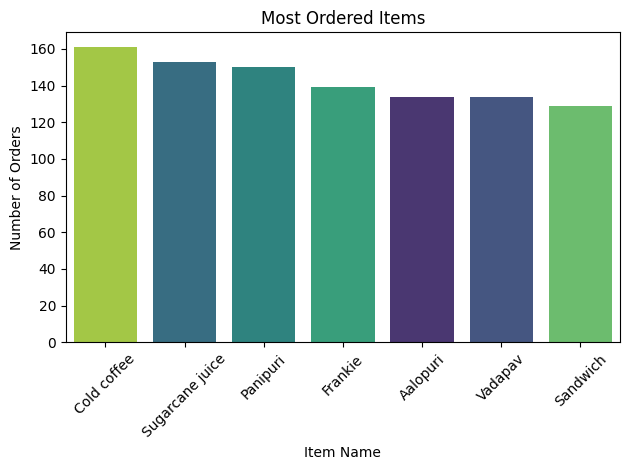

In [48]:
sns.countplot(data=df, x='item_name', order=df['item_name'].value_counts().index, hue='item_name', palette='viridis', legend=False)
plt.title('Most Ordered Items')
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Countplot of Most Selling Items
x-axis: Item names
y-axis: Number of times each item was sold

This graph shows which items are sold most frequently.
Each bar represents how many times a specific item was purchased.
countplot(): Draws a bar chart showing how often each item was sold.

data=df: Uses your dataset.

x='item_name': Shows different items on the x-axis.

order=...: Sorts the items from most sold to least sold.

palette='viridis': Adds color to the bars.

xticks(rotation=45): Tilts labels so they don’t overlap.

tight_layout(): Fixes spacing for better display.


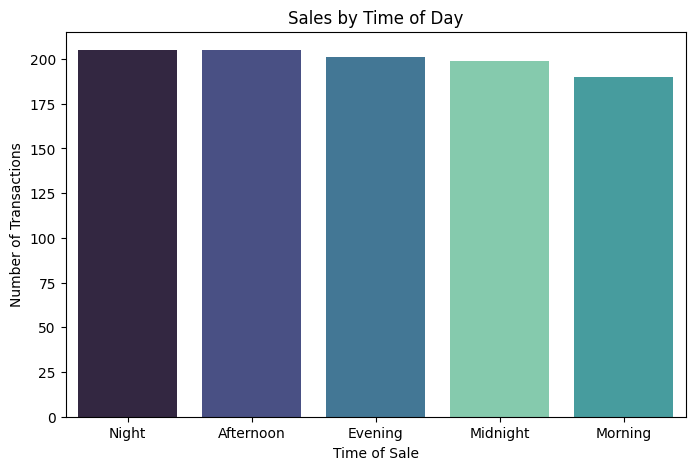

In [57]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='time_of_sale', order=df['time_of_sale'].value_counts().index,hue='time_of_sale' ,palette='mako')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Sale')
plt.ylabel('Number of Transactions')
plt.show()


# Count Plot – Time of Sale


 plt.figure(figsize=(10, 6)): Makes the graph bigger so all item names fit nicely.

sns.countplot(...): Draws a bar chart that shows how many times each item was sold.

data=df: Uses your dataset to pull the data.

x='item_name': Item names are shown on the x-axis.

order=df['item_name'].value_counts().index: Arranges items from most sold to least sold.

palette='viridis': Colors the bars using a nice color theme.

plt.title(...), xlabel, ylabel: Add titles and labels to the chart.

plt.xticks(rotation=45): Rotates the item names so they don't overlap.

plt.tight_layout(): Fixes layout spacing for a clean look.

plt.show(): Displays the chart.


 The y-axis shows how many times each item was sold.

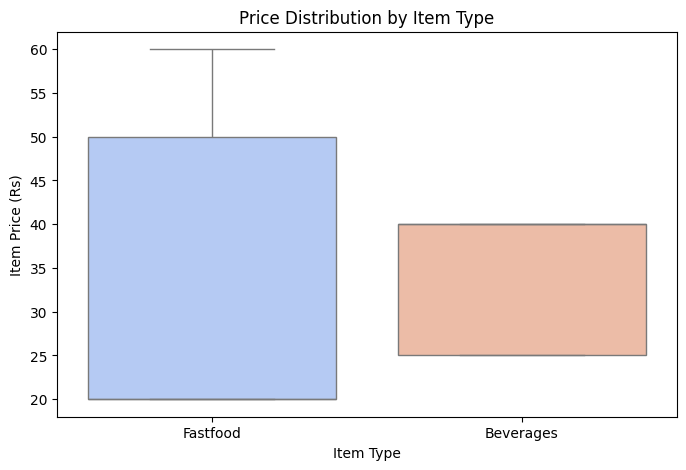

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='item_type', y='item_price',hue='item_type', palette='coolwarm')
plt.title('Price Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item Price (Rs)')
plt.show()


# Box plot
It tells us how prices are spread out for each item type.
Each box shows the range of prices – from lowest to highest.
It also helps spot if any item has a very high or low price (called outliers).

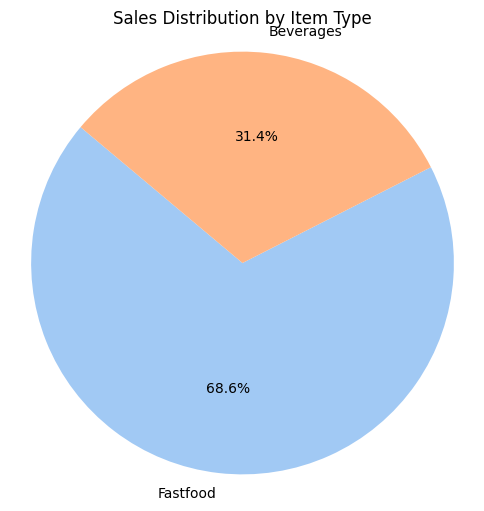

In [61]:
category_counts = df['item_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Item Type')
plt.axis('equal')
plt.show()


# Pie Chart

df['item_type'].value_counts() – counts how many times each type of item was sold (e.g., Fastfood, Beverages).

plt.pie(...) – draws a pie chart to show what percentage of total sales came from each item type.

autopct='%1.1f%%' – displays the percentage on each slice.

plt.axis('equal') – makes sure the pie is a circle, not an oval.